### An investigation into zeros of the Fibonacci function

The function $F(t) = (\phi^t - \cos\pi t \phi^{-t})/\sqrt5$ has complex zeros.  Hand computation in an old-fashioned way gets the following approximate formula.


In [1]:
t0 := (-2*ln(phi)*ln(2) + Pi*ln(2)*I)/(4*ln(phi)^2 + Pi^2);

$$\frac{-2 \ln \left(\phi \right) \ln \left(2\right)+\mathrm{I} \pi  \ln \left(2\right)}{4 \ln \left(\phi \right)^{2}+\pi^{2}}$$

In [2]:
dt := (2*Pi^2+4*Pi*ln(phi)*I)/(4*ln(phi)^2+Pi^2);

$$\frac{2 \pi^{2}+4 \,\mathrm{I} \pi  \ln \left(\phi \right)}{4 \ln \left(\phi \right)^{2}+\pi^{2}}$$

Then $t = t_0 + k dt$ is an approximate zero for $k=1$, $2$, $3$, $\ldots$.  So is its complex conjugate.  Here are the first few.

In [3]:
firstfew := seq( eval( t0 + dt*k, phi=(1+sqrt(5))/2 ), k=1..4 );

$$\frac{2 \pi^{2}+4 \,\mathrm{I} \pi  \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}}+\frac{-2 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right) \ln \left(2\right)+\mathrm{I} \pi  \ln \left(2\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}},\frac{4 \pi^{2}+8 \,\mathrm{I} \pi  \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}}+\frac{-2 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right) \ln \left(2\right)+\mathrm{I} \pi  \ln \left(2\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}},\frac{6 \pi^{2}+12 \,\mathrm{I} \pi  \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}}+\frac{-2 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right) \ln \left(2\right)+\mathrm{I} \pi  \ln \left(2\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}},\frac{8 \pi^{2}+16 \,\mathrm{I} \pi  \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}}+\frac{-2 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right) \ln \left(2\right)+\mathrm{I} \pi  \ln \left(2\right)}{4 \ln \left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^{2}+\pi^{2}}$$

In [4]:
Digits := 15:
evalf( [firstfew] );

$$[ 1.76661248436506+ 0.761835501930495 \,\mathrm{I},  3.59501726799842+ 1.32196541048153 \,\mathrm{I},  5.42342205163178+ 1.88209531903256 \,\mathrm{I},  7.25182683526514+ 2.44222522758359 \,\mathrm{I}]$$

Now let us examine the residuals.

In [5]:
Phi := (1+sqrt(5))/2:
F := t -> (Phi^t - cos(Pi*t)*Phi^(-t))/sqrt(5);

t -> (Phi^t-cos(Pi*t)*Phi^(-t))/sqrt(5)

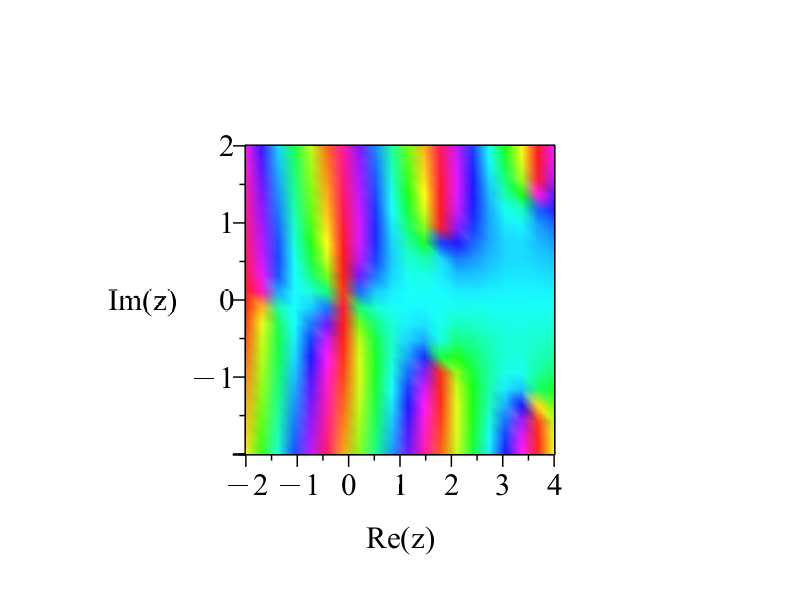

In [6]:
plots [ complexplot3d ]( F(z),
z = -2 - 2* I .. 4 + 2* I ,
style = surfacecontour , contours = [0] ,
orientation = [ -90 , 0] , lightmodel = none ,
font = [ " Arial " , 24] , labelfont = [" Arial " , 24] ,
grid = [20 , 20] , tickmarks = [ default, default , default ]
);

In [7]:
map(abs@evalf@F, evalf( [firstfew] ) );

$$[ 0.00872678915949958,  0.000623035051030428,  0.0000444805832741869,  0.00000317561700169371]$$

The residuals are small and get smaller as $k$ increases.  Our hand computations suggested that the residuals should decrease like $-\exp(i\pi t_k)/2$ for the equivalent function $G(t) = \phi^{2t} - \cos\pi t$, so these ones should decrease like $\phi^{-t}$ times that. The computation below confirms this amply. Simply because the exponent is a number smaller than $0$ this confirms that the formula is getting good estimates of the complex zeros (and the larger the $k$, the better the estimate).

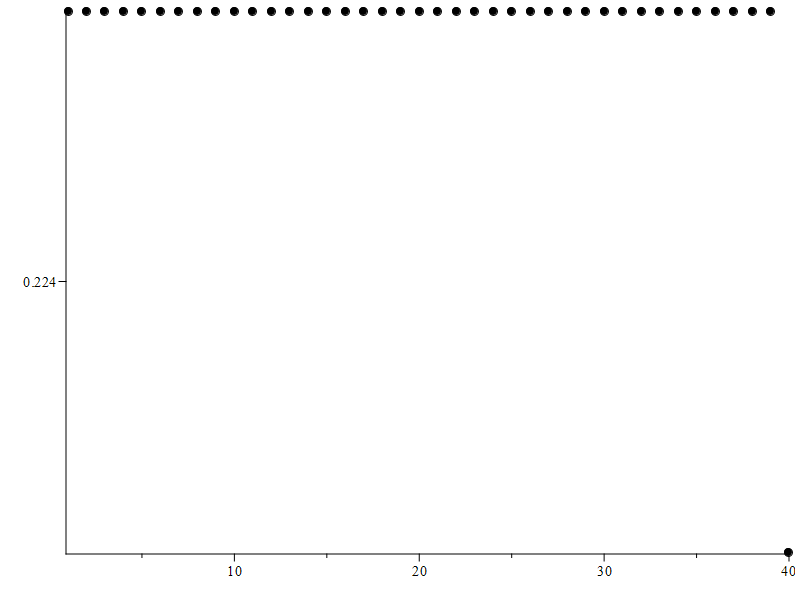

In [8]:
Digits := 80:
N := 40:
eF := t-> Phi^(t)*exp(-I*Pi*t)*F(t):
guess := k -> evalf( abs(evalf(eF(eval(t0+k*dt,phi=Phi)))) ):
plot( [seq( [k,(guess(k))], k=1..N )], style=point, colour=black, symbol=solidcircle, symbolsize=10 );

In [9]:
guess(40);

$$ 0.22360679774997884572296010789617087614980235161825140234703653292104856721068241$$

In [10]:
identify( guess(40) );

kilobytes used=22952, alloc=49221, time=2.64

$$ 0.22360679774997884572296010789617087614980235161825140234703653292104856721068241$$